## Single PL spectrum plot

Expt setting:

- Data collection time: 2025/5/15
- Sampling site: centre, edge of the growth zone
- Exposure time: 1.0s
- Laser Power: 0.1%
- magnification: 100x
- Accumulation: 3
- Central wavelength: 1.81eV
- Laser setting: `532nm` ; grating: `1800 vis`

                   Title:	Single scan measurement
             WiRE version:	4.4.0.6602
        Laser Wavelength:	532.1640137805534 nm
                   Count:	1
                Capacity:	1
      Point Per Spectrum:	1011
               Scan Type:	Static
        Measurement Type:	Single
           Spectral Unit:	counts
              Xlist Unit:	eV
            Xlist Length:	1011
              Ylist Unit:	px
            Ylist Length:	1
Normalized Residual: 0.0006 (Perfect fit has R = 0)

Trion: 1.81 eV   | FWHM: 0.07 eV  | Amplitude: 0.47
Exciton: 1.83 eV | FWHM: 0.05 eV  | Amplitude: 0.67


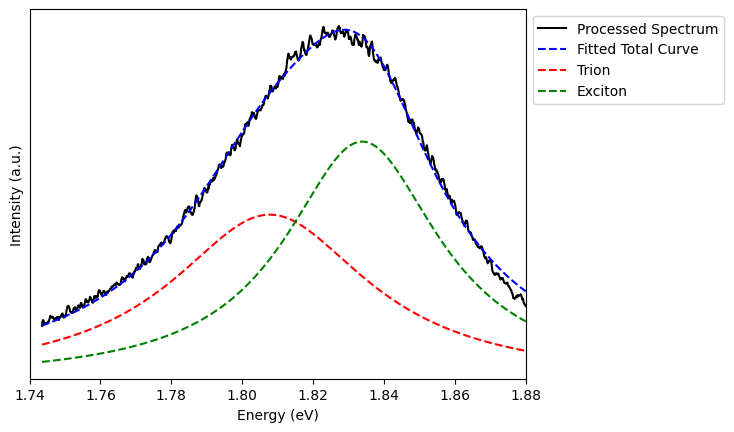

In [22]:
from renishawWiRE import WDFReader
from PLfit import PLfit

# Read data from .wdf file
filename = 'PL Sample.wdf'
reader = WDFReader(filename)

# Read all data points in the spectrum
energy = reader.xdata[:]
intensity = reader.spectra[:]

# Print measurement information
reader.print_info()

# Instantiate the PLfit class with the PL data
pl_fit = PLfit(intensity, energy,
           background_remove=False, # In most cases, background removal is not necessary
        #    baseline_method='poly',  # or 'gaussian'
        #    poly_degree=1,           # for polynomial background
           smoothing=True, smooth_window=11,    # Smoothing the data if it is too noisy
           normalize=True          # Normalize = true if you want to a.u. unit fitting
           )
# Update bounds if needed (e.g., for exciton or trion)
pl_fit.update_bounds(

            trion =([1.8, 0, 0], [1.86, 0.05, 0.05]),        # Lower and upper boundaries of lorenzian models, the number are given as [peak, scale, amplitude]
            exciton =([1.82, 0, 0], [1.88, 0.05, 0.1])     # Please note that lorenzian has "peak height = amp / (pi * scale)"
)

# Perform fitting
params, params_cov = pl_fit.fit_spectrum()

# Plot the results with optional offset and scale
pl_fit.plot_fit(params,             # the parameters fitted by fit_spectrum
                offset=0,           # Offset of fitted-curve to raw data 
                scale=1,            # Intensity multiply scale for plotting 
                x_lim=[1.74,1.88]   # x-axis limit for plotting, unit: eV
                )